In [ ]:
                                                                                                                                                                                                                                                                !pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Necessary libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import cv2

# Cloning Git repository and downloading data

In [ ]:
!git clone https://github.com/neheller/kits19.git

Cloning into 'kits19'...
remote: Enumerating objects: 1023, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 1023 (delta 6), reused 14 (delta 4), pack-reused 1003
Receiving objects: 100% (1023/1023), 29.74 MiB | 38.11 MiB/s, done.
Resolving deltas: 100% (467/467), done.


In [ ]:
cd /content/drive/MyDrive/FYP/Dataset/kits19

/content/drive/MyDrive/FYP/Dataset/kits19


# Downloading the Requirements for this dataset

In [ ]:
!pip3 install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Dowloading the Image files in the dataset

In [ ]:
!python3 -m starter_code.get_imaging

0 cases to download...


# Data Loading And Preprocessing
###case_00000 to case_00209 correspond to training data according to the dataset

1)Loading the data using a function , Creating the numpy array for the loaded data and generating a dictionary

In [ ]:
from starter_code.utils import load_case

Dict_Images = defaultdict(list)
HOUNSFIELD_MIN = -1024
HOUNSFIELD_MAX = 3000
HOUNSFIELD_RANGE = HOUNSFIELD_MAX - HOUNSFIELD_MIN


def Normalize_Intensity(img1):
  img1[img1 < HOUNSFIELD_MIN] = HOUNSFIELD_MIN
  img1[img1 > HOUNSFIELD_MAX] = HOUNSFIELD_MAX
  return (img1 - HOUNSFIELD_MIN) / HOUNSFIELD_RANGE


for i in range(0,3):

  #Looping through each id
  a=str(i).zfill(5)
  data_itr="case_"
  data_id=data_itr+a

  #loading the data using the function provided in the repository
  train_volume, train_segmentation = load_case(data_id)

  #Getting the data inform on ndarray 
  img=train_volume.get_fdata()
  seg=train_segmentation.get_fdata()

  #Normalizing image volumes to have minimum value of 0
  img_Norm=Normalize_Intensity(img)
  
  #Generating dictionary for case
  Dict_Images[data_id].append(img_Norm)
  Dict_Images[data_id].append(seg)
  print(data_id,img.shape , seg.shape)





case_00000 (611, 512, 512) (611, 512, 512)
case_00001 (602, 512, 512) (602, 512, 512)
case_00002 (261, 512, 512) (261, 512, 512)


In [ ]:
len(Dict_Images["case_00002"][1])


261

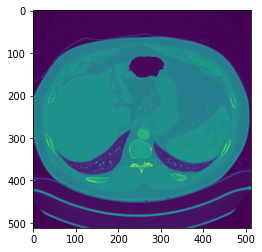

In [ ]:
# a=Dict_Images["case_00002"][1]
# for i in range(0,261):
image_slice=a[52,::]
plt.imshow(image_slice)


In [ ]:
a=Dict_Images["case_00001"][0]
b=Dict_Images["case_00001"][1]

Visualizing Image

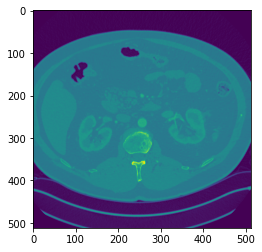

In [ ]:
image_slice=a[250,::]
plt.imshow(image_slice)

Visualizing Mask

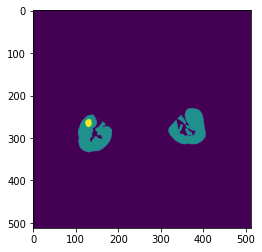

In [ ]:
image_seg=b[250,::]
plt.imshow(image_seg)

In [ ]:
OutDir="/content/drive/MyDrive/FYP/Dataset/PNG_Slices"
# os.mkdir(OutDir)
str1="Images"
str2="Segmentation"

for i in range(200,205):

  a=str(i).zfill(5)
  data_id="case_"
  data_id=data_itr+a

  p1=os.path.join(OutDir, data_id)
  os.mkdir(p1)


  p2=os.path.join(p1,str1)
  p3=os.path.join(p1,str2)
  os.mkdir(p2)
  os.mkdir(p3)

  Sample_images=Dict_Images[data_id][0]
  Sample_segs=Dict_Images[data_id][1]

  for i in range(len(Sample_images)):
    Sample_img_slice=Sample_images[i,::]*255
    Sample_seg_slice=Sample_segs[i,::]
    fout_img = os.path.join(p2, f'{data_id+"-"+str(i)}.png')
    fout_seg = os.path.join(p3, f'{data_id+"-"+str(i)}.png')
    cv2.imwrite(fout_img, Sample_img_slice)
    cv2.imwrite(fout_seg, Sample_seg_slice)










